In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/200k-spotify-songs-light-dataset/light_spotify_dataset.json
/kaggle/input/200k-spotify-songs-light-dataset/light_spotify_dataset.csv


In [2]:
df = pd.read_json('/kaggle/input/200k-spotify-songs-light-dataset/light_spotify_dataset.json', lines=True)
df
# Create copy to not mess with original integrity 
df1 = df.copy()
pd.reset_option('display.max_rows')


In [3]:
# Clean up data columns for queries later on 
# Lower case all of the columns 
# Replace spaces and hyphens with underscores
df1.columns = df1.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

In [4]:
list(df1.columns)

['artist',
 'song',
 'emotion',
 'variance',
 'genre',
 'release_date',
 'key',
 'tempo',
 'loudness',
 'explicit',
 'popularity',
 'energy',
 'danceability',
 'positiveness',
 'speechiness',
 'liveness',
 'acousticness',
 'instrumentalness']

In [5]:
df1.dtypes

artist               object
song                 object
emotion              object
variance            float64
genre                object
release_date          int64
key                  object
tempo                 int64
loudness            float64
explicit             object
popularity            int64
energy                int64
danceability          int64
positiveness          int64
speechiness           int64
liveness              int64
acousticness          int64
instrumentalness      int64
dtype: object

In [6]:
# Remove duplicates 
df.drop_duplicates()
# Check for null values 
df.isnull().sum()

artist              0
song                8
emotion             0
variance            0
Genre               0
Release Date        0
Key                 0
Tempo               0
Loudness            0
Explicit            0
Popularity          0
Energy              0
Danceability        0
Positiveness        0
Speechiness         0
Liveness            0
Acousticness        0
Instrumentalness    0
dtype: int64

In [7]:
df.shape

(236988, 18)

In [8]:
df1['artist'].value_counts()

artist
Genius English Translations     1604
Lil Wayne                        753
Juice WRLD                       647
Chris Brown                      589
Gucci Mane                       522
                                ... 
Marshmello & Bastille              1
Marshmello & Demi Lovato           1
Marshmello & Halsey                1
Marshmello & Imanbek               1
  (Alla Pugacheva) & 50 Cent       1
Name: count, Length: 30607, dtype: int64

In [9]:
# Create a artist filter option so that we can retrieve information for each artist individually if we want to easy filter later on 
def artist_filter(artist):
    artist_df = df1[df1['artist'] == artist]
    
    return artist_df

# Example of Filter
artist_filter('Juice WRLD').head()

,artist,song,emotion,variance,genre,release_date,key,tempo,loudness,explicit,popularity,energy,danceability,positiveness,speechiness,liveness,acousticness,instrumentalness
158375,Juice WRLD,All Girls Are the Same,anger,0.833514,rap,2018,C Maj,162,-7.23,Yes,84,53,67,20,31,9,8,0
158376,Juice WRLD,Wishing Well,sadness,0.833514,rap,2020,A min,150,-6.13,Yes,78,61,65,8,13,27,0,0
158377,Juice WRLD,Robbery,fear,0.833514,rap,2019,D Maj,80,-5.12,Yes,80,69,62,57,5,15,33,0
158378,Juice WRLD,Legends,surprise,0.833514,rap,2018,E Maj,142,-5.24,Yes,70,80,59,38,8,14,12,0
158379,Juice WRLD,Righteous,joy,0.833514,rap,2020,C Maj,143,-7.43,Yes,72,62,71,22,3,13,4,0


In [10]:
# Create a genre filter option so that we can retrieve information for each artist individually if we want to easy filter later on 
def genre_filter(genre):
    genre_df = df1[df1['genre'] == genre]
    
    return genre_df

# Example of filter
genre_filter('rap').head()

,artist,song,emotion,variance,genre,release_date,key,tempo,loudness,explicit,popularity,energy,danceability,positiveness,speechiness,liveness,acousticness,instrumentalness
3639,David Allan Coe,A Sense Of Humor,joy,0.060847,rap,1983,F Maj,84,-12.37,No,63,43,67,53,5,13,24,0
3640,David Allan Coe,Ain't It Funny The Way Love Can Do Ya,surprise,0.207500,rap,1981,A Maj,115,-12.82,No,8,23,61,34,3,10,75,0
3641,David Allan Coe,Another Pretty Country Song,joy,0.122474,rap,1975,D Maj,135,-9.01,No,34,55,62,64,4,31,62,0
3642,David Allan Coe,As Far As This Feeling Will Take Us,joy,0.226071,rap,1981,C Maj,89,-11.62,No,5,29,62,26,2,22,56,0
3643,David Allan Coe,Back To Atlanta,joy,-0.016667,rap,1980,F Maj,97,-12.39,No,5,27,53,23,3,13,75,0


In [11]:
# Store all of names of the songs from the artists into a lists 
# Create the dictionary
artist_songs_dict = df.groupby('artist')['song'].apply(list).to_dict()

# Convert it to a DataFrame
artist_songs_df = pd.DataFrame(list(artist_songs_dict.items()), columns=['artist', 'songs'])

# Create new column that counts the length of the list 
artist_songs_df['num_of_songs'] = artist_songs_df['songs'].apply(lambda x: len(x) if isinstance(x, list) else 'NA')
# Sort the num_of_songs in descending order
artist_songs_df = artist_songs_df.sort_values('num_of_songs', ascending=False).reset_index()

# Inspect the data for the artists with the highest number of songs 
artist_songs_df.loc[0:25, ['artist', 'songs', 'num_of_songs']]

,artist,songs,num_of_songs
0,Genius English Translations,[Luis Fonsi Daddy Yankee - Despacito Remix ft...,1604
1,Lil Wayne,"[1St Key, A Dedication, A Millie Sold (Remix),...",753
2,Juice WRLD,"[All Girls Are the Same, Wishing Well, Robbery...",647
3,Chris Brown,"[100 Bottles, ABC's, Ain't No Way (You Won't L...",589
4,Gucci Mane,"[Birds Of A Feather, Decapitated, Deuces Lyric...",522
5,Drake,"[6 Man, Believe It Or Not, Best I Ever Had, Br...",513
6,Kanye West,"[Anyway, Bad News, Barry Bonds, Be-Cleve In Yo...",471
7,BONES,"[Dirt, HDMI, RestInPeace, CtrlAltDelete, Sodiu...",456
8,Chief Keef,"[I Dont Like, Faneto, Hate Bein Sober, Earned ...",453
9,Eminem,"[25 to Life, 3 A.M., 3 Verses, Above The Law, ...",423


In [12]:
# Common Genre Filters
rap_filter = genre_filter('rap')
country_filter = genre_filter('country')
christian_filter = genre_filter('christian')
jazz_filter = genre_filter('jazz')
folk_filter = genre_filter('folk')
electronic_filter = genre_filter('christian')
soul_filter = genre_filter('soul')


In [13]:
# How many number of unique genre labels are there? 
df1['genre'].nunique() # Prints 2,562

2562

In [14]:
def genre_statistics(df):
    # Sum popularity per genre
    genre_group = df.groupby('genre').popularity.sum().reset_index()
    
    # Find the most common emotion per genre
    common_emotions = df.groupby('genre')['emotion'].agg(lambda x: x.mode()[0]).reset_index()
    
    # Find the most common key per genre
    common_key = df.groupby('genre')['key'].agg(lambda x: x.mode()[0]).reset_index()
    
    # Find the average loudness per genre
    avg_loudness = df.groupby('genre')['loudness'].mean().reset_index()

    # Find the most popular artist per genre
    most_popular_artist = df.loc[df.groupby('genre')['popularity'].idxmax()][['genre', 'artist']]
    
    # Merge all the dataframes together
    genre_group = genre_group.merge(common_emotions, on='genre')
    genre_group = genre_group.merge(common_key, on='genre')
    genre_group = genre_group.merge(avg_loudness, on='genre')
    genre_group = genre_group.merge(most_popular_artist, on='genre')

    # Rename Columns (use inplace or axis=1 for renaming)
    genre_group = genre_group.rename(columns={
        'popularity': 'genre_popularity_score', 
        'emotion': 'most_common_emotion_for_genre', 
        'key': 'most_common_genre_key', 
        'loudness': 'avg_loudness', 
        'artist': 'most_popular_artist'
    })
    
    return genre_group

genre_statistics(rap_filter)

,genre,genre_popularity_score,most_common_emotion_for_genre,most_common_genre_key,avg_loudness,most_popular_artist
0,rap,1400103,anger,C# Maj,-7.03758,Travis Scott


In [15]:
songs_per_year = df1.groupby('release_date')['song'].nunique().reset_index()
songs_per_year.rename(columns={'song': 'unique_song_count'}, inplace=True)

fig = px.bar(
    songs_per_year,
    x='release_date',
    y='unique_song_count',
    template='presentation',
    title='Unique Songs Released per Date'
)


fig.show(renderer='iframe_connected')

In [16]:
fig = px.density_heatmap(
    songs_per_year,
    x='release_date',
    y='unique_song_count',
    color_continuous_scale='Viridis',
    title='Heatmap of Genres and Years of Songs'
)


fig.show(renderer='iframe_connected')

1. Blue bars (left y-axis): The number of unique songs released on each release date. Taller bars mean more unique songs were released that year.

2. Red line (right y-axis): The cumulative percentage of all unique songs accounted for as you move across the dates. It shows how quickly the total number of songs accumulates.

3. Interpretation:

   - Right side: Years with the most unique songs — they contribute heavily to the total.

    - Cumulative line: Remains steady at first (because a for many years, songs weren't being recorded), then increases sharply (later years contribute a cumulative majority songs).

    - Pareto insight: Often, a small number of years account for a large percentage of total songs — this is the 80/20 principle in action (e.g., 20% of dates might hold 80% of the songs).

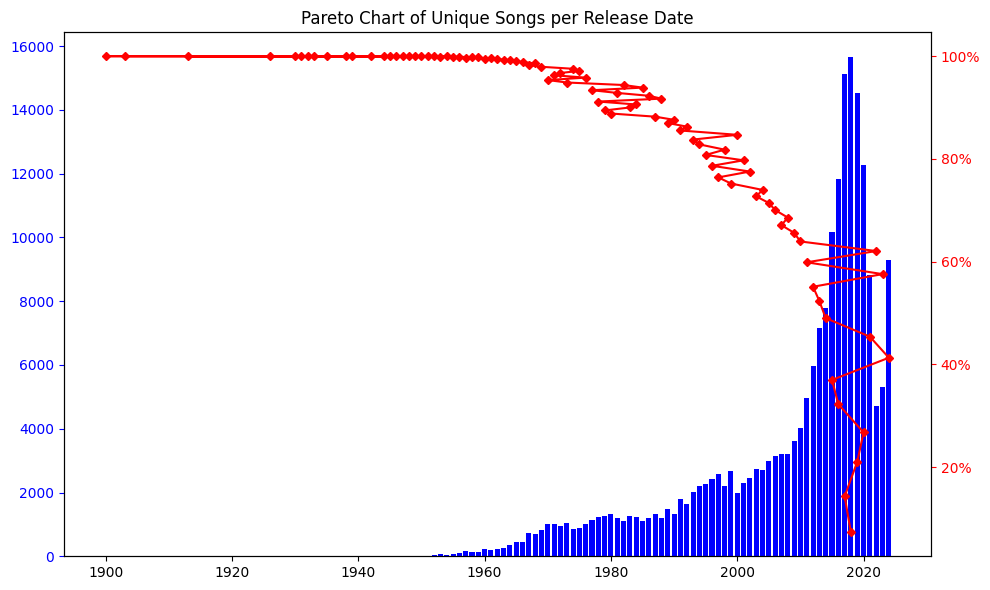

In [17]:

# Sort by count descending for Pareto chart
songs_per_year = songs_per_year.sort_values(by='unique_song_count', ascending=False).reset_index(drop=True)

# Add cumulative percentage
songs_per_year['cumperc'] = songs_per_year['unique_song_count'].cumsum() / songs_per_year['unique_song_count'].sum() * 100

# Set aesthetics
color1 = 'blue'
color2 = 'red'
line_size = 4

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(songs_per_year['release_date'], songs_per_year['unique_song_count'], color=color1)

# Add cumulative line
ax2 = ax.twinx()
ax2.plot(songs_per_year['release_date'], songs_per_year['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Aesthetic tuning
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
plt.xticks(rotation=45)
plt.title('Pareto Chart of Unique Songs per Release Date')

plt.tight_layout()
plt.show()


In [18]:
# Set artist and genre names for title
genre_name = 'christian'


# Remember the genre and artist filter
genre = genre_filter(genre_name) # e.g., adjust genre name to your preference

# Chart Title
chart_title = 'Genre - Song/Emotion Visual'

# Further filtering for faster query
# Make sure to adjust DataFrame being filtered to the new variable name (ie. artist or genre)
filter_down = genre[['genre', 'song', 'emotion']].reset_index()
emotions_in_songs = filter_down.groupby(['genre', 'song']).emotion.nunique()

fig = px.histogram(
    filter_down, 
    title=chart_title,
    x="genre", 
    y="song", 
    color="genre", 
    pattern_shape="emotion", 
    histfunc='count', 
    template='presentation',
    color_discrete_sequence=px.colors.qualitative.Set3,
    labels={
        "genre": "Genre",
        "count": "Number of Songs"
    }
)


fig.show(renderer='iframe_connected')

In [19]:
# Set artist names for title
artist_name = 'Lil Wayne' # e.g., adjust artist name to your preference


# Remember the genre and artist filter
artist = artist_filter(artist_name) 

# Chart Title
chart_title = 'Artist - Song/Emotion Visual'

# Further filtering for faster query
# Make sure to adjust DataFrame being filtered to the new variable name (ie. artist or genre)
filter_down = artist[['genre', 'song', 'emotion']].reset_index()
emotions_in_songs = filter_down.groupby(['genre', 'song']).emotion.nunique()

fig = px.histogram(
    filter_down, 
    title=chart_title,
    x="genre", 
    y="song", 
    color="genre", 
    pattern_shape="emotion", 
    histfunc='count', 
    template='presentation',
    color_discrete_sequence=px.colors.qualitative.Set3,
    labels={
        "artist": "Artist",
        "count": "Number of Songs"
    }
)

fig.show(renderer='iframe_connected')